In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
# Load the data

df = pd.read_csv("Facturacionagua.csv", sep= ";")

In [68]:
df.head(5)

,CodArea,NomArea,Calle,Portal,Bloque,Piso,Mano,NIA,Ref unica,FechaUlti,LectUlti,TipoLectUlti,FechaAnt,LectAnt,TipoLectAnt,Tarifa,F Alta
0,3003,AMA-3,1770,1,NaN,BJ,NaN,422521,1950546,2015-08-05,2021,R,2015-04-27,1996,R,2,2013-12-02
1,3003,AMA-3,1770,1,NaN,NaN,NaN,288966,1218508,2015-09-28,31905,R,2015-08-27,31781,R,10,2003-01-01
2,3003,AMA-3,1770,1,NaN,1,DCH,43572,1891949,2014-10-28,94,R,2014-09-25,89,R,2,2012-07-18
3,3003,AMA-3,1770,1,NaN,BJ,NaN,422521,1950535,2015-08-06,1455,R,2015-02-05,1439,R,2,2013-12-02
4,3003,AMA-3,1970,19,NaN,1,DCH,379819,1557743,2015-08-06,2050,R,2015-05-05,2002,R,1,2005-12-16


In [69]:
df.isna().sum()
''' there are some but not a big deal for our analysis'''

' not a big deal for our analysis '

In [70]:
# Visualize numeric variables

description = df.describe().T

/var/folders/bd/40zqj6cj2170f4bjkj40r7kc0000gn/T/ipykernel_12286/1993337974.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x="NomArea", bins=3, palette= "bwo")


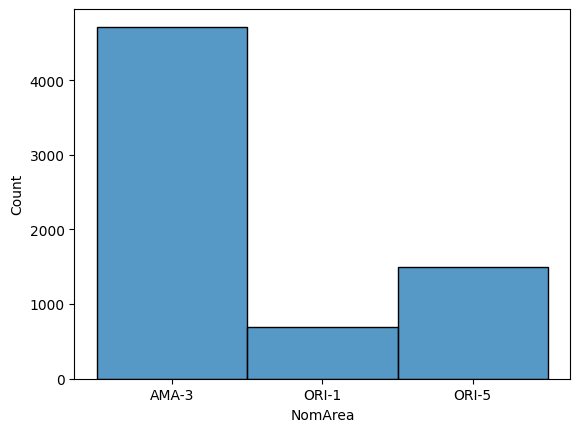

In [71]:

df["NomArea"].value_counts()

plt.figure()
sns.histplot(data=df, x="NomArea", bins=3, palette= "bwo")
plt.show()


In [72]:
# Convert "FechaAnt" column to datetime format with error handling
df["FechaAnt"] = pd.to_datetime(df["FechaAnt"], format="%Y-%m-%d", errors="coerce")

# Convert "FechaUlti" column to datetime format with error handling
df["FechaUlti"] = pd.to_datetime(df["FechaUlti"], format="%Y-%m-%d", errors="coerce")

In [73]:
df["Timedelta"] =  df["FechaUlti"] - df["FechaAnt"]
df.head(5)

,CodArea,NomArea,Calle,Portal,Bloque,Piso,Mano,NIA,Ref unica,FechaUlti,LectUlti,TipoLectUlti,FechaAnt,LectAnt,TipoLectAnt,Tarifa,F Alta,Timedelta
0,3003,AMA-3,1770,1,NaN,BJ,NaN,422521,1950546,2015-08-05,2021,R,2015-04-27,1996,R,2,2013-12-02,100 days
1,3003,AMA-3,1770,1,NaN,NaN,NaN,288966,1218508,2015-09-28,31905,R,2015-08-27,31781,R,10,2003-01-01,32 days
2,3003,AMA-3,1770,1,NaN,1,DCH,43572,1891949,2014-10-28,94,R,2014-09-25,89,R,2,2012-07-18,33 days
3,3003,AMA-3,1770,1,NaN,BJ,NaN,422521,1950535,2015-08-06,1455,R,2015-02-05,1439,R,2,2013-12-02,182 days
4,3003,AMA-3,1970,19,NaN,1,DCH,379819,1557743,2015-08-06,2050,R,2015-05-05,2002,R,1,2005-12-16,93 days


In [74]:
# Consumption per day
# Create new variables related to consumption

df["m3"]= (df["LectUlti"] - df["LectAnt"])
df["Duration (s)"] = df["Timedelta"].apply(lambda x: x.total_seconds())
df["Days"] = df["Duration (s)"]/86400
df["m3/day"] = df["m3"]/df["Days"]
df.head(5)


,CodArea,NomArea,Calle,Portal,Bloque,Piso,Mano,NIA,Ref unica,FechaUlti,...,FechaAnt,LectAnt,TipoLectAnt,Tarifa,F Alta,Timedelta,m3,Duration (s),Days,m3/day
0,3003,AMA-3,1770,1,NaN,BJ,NaN,422521,1950546,2015-08-05,...,2015-04-27,1996,R,2,2013-12-02,100 days,25,8640000.0,100.0,0.250000
1,3003,AMA-3,1770,1,NaN,NaN,NaN,288966,1218508,2015-09-28,...,2015-08-27,31781,R,10,2003-01-01,32 days,124,2764800.0,32.0,3.875000
2,3003,AMA-3,1770,1,NaN,1,DCH,43572,1891949,2014-10-28,...,2014-09-25,89,R,2,2012-07-18,33 days,5,2851200.0,33.0,0.151515
3,3003,AMA-3,1770,1,NaN,BJ,NaN,422521,1950535,2015-08-06,...,2015-02-05,1439,R,2,2013-12-02,182 days,16,15724800.0,182.0,0.087912
4,3003,AMA-3,1970,19,NaN,1,DCH,379819,1557743,2015-08-06,...,2015-05-05,2002,R,1,2005-12-16,93 days,48,8035200.0,93.0,0.516129


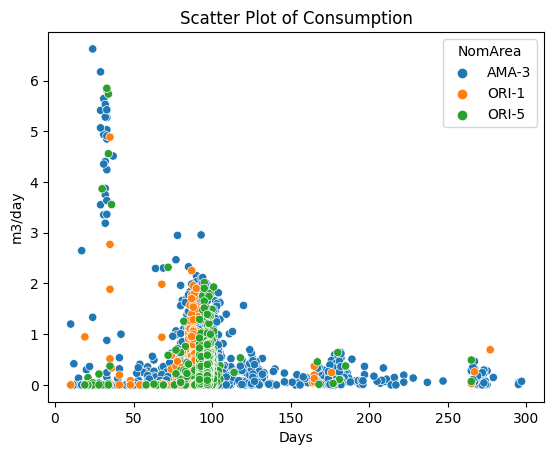

In [83]:


plt.figure()
sns.scatterplot(data=df, x="Days", y="m3/day", hue="NomArea")
plt.xlabel("Days")
plt.ylabel("m3/day")
plt.title("Scatter Plot of Consumption")
plt.show()


In [76]:
# Filter data
df_amara3= df.loc[df['NomArea'] == 'AMA-3']
df_ORI1= df.loc[df['NomArea'] == 'ORI-1']
df_ORI5= df.loc[df['NomArea'] == 'ORI-5']

In [77]:
amara3_avg_days= df_amara3["Days"].mean()
ori1_avg_days= df_ORI1["Days"].mean()
ori5_avg_days= df_ORI5["Days"].mean()

df_avg_days = pd.DataFrame({'zones': ['amara3', 'ori1', 'ori5'], 'average days': [amara3_avg_days, ori1_avg_days, ori5_avg_days]})



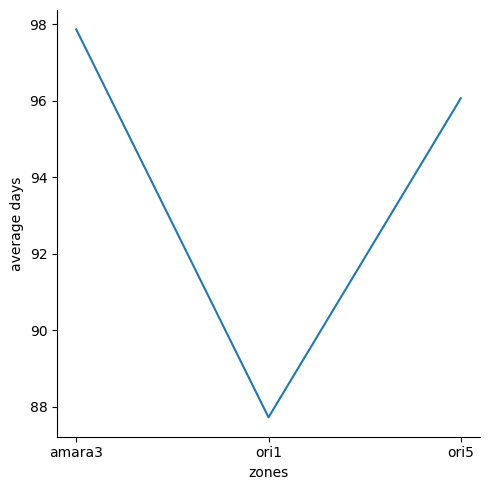

In [78]:
sns.relplot(data=df_avg_days,
            x="zones",
            y="average days",
            kind="line")

In [79]:
# Extract the neighborhoods of the 10 houses with the shortest time between readings: overall and in the Orioventa neighborhood.

df.loc[df["Days"].sort_values(ascending=True).index, "NomArea"].head(10)



df_ORI = pd.concat([df_ORI1 , df_ORI5])
df_ORI.loc[df_ORI["Days"].sort_values(ascending=True).index, "NomArea"].head(10)



5359    ORI-1
4743    ORI-1
6134    ORI-5
6135    ORI-5
5514    ORI-5
5633    ORI-5
5631    ORI-5
5597    ORI-5
5609    ORI-5
5547    ORI-5
Name: NomArea, dtype: object

<Axes: xlabel='TipoLectUlti'>

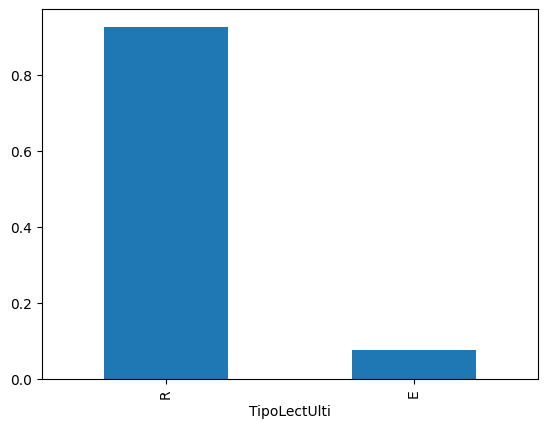

In [80]:
df["TipoLectUlti"].value_counts("R").plot(kind="bar")
